In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib


print(tf.__version__)

2.1.0-rc1


In [0]:
import tensorflow_hub as hub

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class_names = ['bittergourd','coffee','cotton','jute','maize','rice','soybean','sugarcane','tea','wheat']

In [0]:
with open('labels.txt', 'w') as f:
  f.write('\n'.join(class_names))

In [0]:
#path = "/content/drive/My Drive/Colab Notebooks/train.csv"


In [0]:
base_dir = '/content/drive/My Drive/Crop Dataset'
train_dir = os.path.join(base_dir, 'train_dataset')
validation_dir = os.path.join(base_dir, 'test_dataset')

train_tea_dir = os.path.join(train_dir, 'tea')  # directory with our training tea pictures
train_coffee_dir = os.path.join(train_dir, 'coffee')  # directory with our training coffee pictures
train_bittergourd_dir = os.path.join(train_dir, 'bittergourd')
train_jute_dir = os.path.join(train_dir, 'jute')
train_rice_dir = os.path.join(train_dir, 'rice')
train_soybean_dir = os.path.join(train_dir, 'soybean')
train_sugarcane_dir = os.path.join(train_dir, 'sugarcane')
train_wheat_dir = os.path.join(train_dir, 'wheat')
train_cotton_dir = os.path.join(train_dir, 'cotton')
train_maize_dir  = os.path.join(train_dir, 'maize')

# Understanding the data

In [0]:
num_tea_tr = len(os.listdir(train_tea_dir))
num_coffee_tr = len(os.listdir(train_coffee_dir))
num_bittergourd_tr = len(os.listdir(train_bittergourd_dir))
num_jute_tr = len(os.listdir(train_jute_dir))
num_rice_tr = len(os.listdir(train_rice_dir))
num_soybean_tr = len(os.listdir(train_soybean_dir))
num_sugarcane_tr = len(os.listdir(train_sugarcane_dir))
num_wheat_tr = len(os.listdir(train_wheat_dir))
num_cotton_tr = len(os.listdir(train_cotton_dir))
num_maize_tr = len(os.listdir(train_maize_dir))
total_train = num_tea_tr + num_coffee_tr + num_bittergourd_tr + num_jute_tr + num_cotton_tr + num_rice_tr + num_soybean_tr + num_sugarcane_tr + num_wheat_tr + num_maize_tr

In [10]:
print('Total Tea crop field images :',num_tea_tr)
print('Total Coffee crop field images :',num_coffee_tr)
print('Total Training images:',total_train)

Total Tea crop field images : 97
Total Coffee crop field images : 74
Total Training images: 813


# Setting Model Parameters

In [0]:
BATCH_SIZE = 5  # Number of training examples to process before updating our models variables
IMG_SIZE  = 224  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [12]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SHAPE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SHAPE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


# Data preparation

In [0]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator  = ImageDataGenerator(rescale=1./255)  # Generator for our testing data

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SIZE,IMG_SIZE), #(224,224)
                                                           class_mode='sparse')

test_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SIZE,IMG_SIZE), #(224,224)
                                                           class_mode='sparse')

Found 795 images belonging to 10 classes.
Found 73 images belonging to 10 classes.


# Visualizing Training Images

In [0]:
sample_training_images, _ = next(train_data_gen) 

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

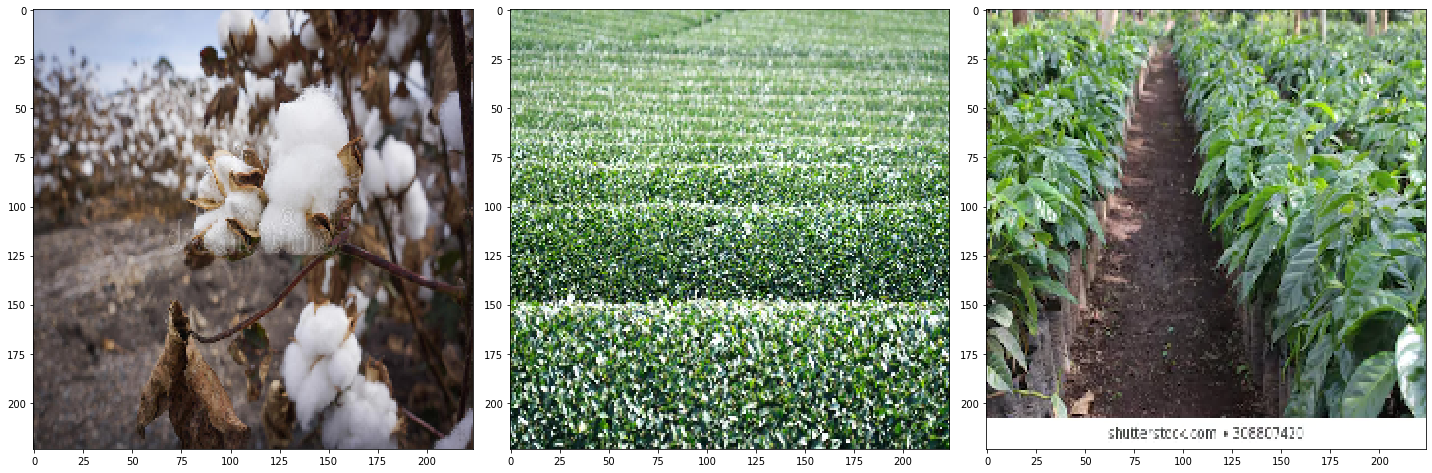

In [17]:
plotImages(sample_training_images[:3])  # Plot images 0-3

# Model Creation

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


# Transfer Learning

In [0]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape= (IMG_SIZE, IMG_SIZE,3), 
                                   output_shape=[FV_SIZE],
                                   trainable=False)

In [0]:
#feature_extractor.trainable = False

In [19]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
EPOCHS = 30
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(10))),
    epochs=EPOCHS,
    validation_data = test_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 82 steps, validate for 15 steps
Epoch 1/30
82/82 [==============================] - 209s 3s/step - loss: 1.7515 - accuracy: 0.4317 - val_loss: 0.9789 - val_accuracy: 0.7260
Epoch 2/30
82/82 [==============================] - 87s 1s/step - loss: 0.8759 - accuracy: 0.7195 - val_loss: 0.6258 - val_accuracy: 0.8219
Epoch 3/30
82/82 [==============================] - 45s 553ms/step - loss: 0.6033 - accuracy: 0.8390 - val_loss: 0.4908 - val_accuracy: 0.8904
Epoch 4/30
82/82 [==============================] - 30s 364ms/step - loss: 0.4496 - accuracy: 0.8756 - val_loss: 0.4241 - val_accuracy: 0.8356
Epoch 5/30
82/82 [==============================] - 6s 77ms/step - loss: 0.4161 - accuracy: 0.8902 - val_loss: 0.4425 - val_accuracy: 0.8630
Epoch 6/30
82/82 [==============================] - 13s 157ms/step - loss: 0.3378 - accuracy: 0.9268 - val_loss: 0.3357 - val_accuracy: 0.9178
Epoch 7/30
82/82 [==============================] - 9s 106ms/step - loss: 0.2751 - accuracy: 0.9439 - val_l

# Visualizing results of training

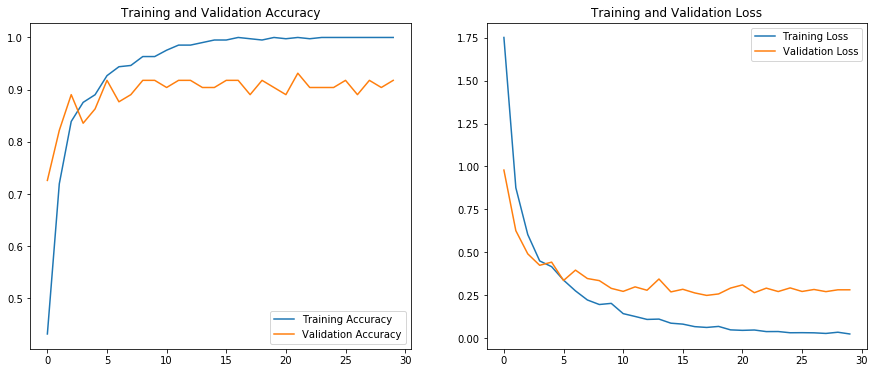

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

# Exporting to TFLITE

In [0]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [0]:
#@title Select mode of optimization
mode = "Storage" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT

In [0]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
#converter.optimizations = []
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
#converter.allow_custom_ops=False
tflite_model = converter.convert()

In [0]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

# Test the model with TFLite Interpreter

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

# Trying to Predict for single image

In [0]:
import cv2
img_array = cv2.imread('/content/drive/My Drive/Crop Dataset/train_dataset/tea/1.jpeg')
img_array = cv2.resize(img_array,IMAGE_SHAPE)
img_array = img_array/255
img_array = np.expand_dims(img_array,axis=0)
img = tf.cast(img_array, tf.float32)
img.shape

TensorShape([1, 224, 224, 3])

In [0]:
# Gather results for the randomly sampled test images
predictions = []
test_labels = []
test_images = []
interpreter.set_tensor(input_index, img)
interpreter.invoke()
predictions.append(interpreter.get_tensor(output_index))
#test_labels.append(label[0])
#test_images.append(np.array(img))

In [0]:
predictions

[array([[9.9763712e-03, 2.9927015e-04, 9.9618435e-02, 7.3443621e-04,
         2.5623224e-03, 2.8147351e-03, 1.0476551e-01, 1.1901727e-02,
         7.0183736e-01, 6.5489814e-02]], dtype=float32)]

In [0]:
ind = np.argmax(predictions)
print('Predicted crop is: ',class_names[ind])

Predicted crop is:  tea


# Download TFLite models and Labels

In [0]:
try:
  from google.colab import files

  files.download(tflite_model_file)
  files.download('labels.txt')
except:
  pass